请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 

# 波士顿房价预测任务（线性回归、岭回归实现）

包括数据准备、模型训练、模型评估与选择、性能度量、参数选择

## 问题背景与数据集介绍

波士顿房价预测是一个经典的机器学习任务，类似于程序员世界的“Hello World”。和大家对房价的普遍认知相同，波士顿地区的房价受诸多因素影响。美国某经济杂志登出波士顿房价数据集，该数据集包含506条观测信息，统计了13种可能影响房价的因素（输入变量）和该类型房屋的均价（输出变量），其中每条观测信息包含城镇犯罪率、一氧化氮浓度、住宅平均房间数、到中心区域的加权距离以及自住房平均房价等关于波士顿周边或者城镇房价的描述，期望通过分析影响波士顿房价的因素来构建房价预测模型。相关属性描述如下图所示，其中最后一项就是想要预测的房屋均价。

![](https://ai-studio-static-online.cdn.bcebos.com/be005522b4c441ba89ee7a2ad8277f7c8706457a7a8e4b5f84f92591a32b701d)


观测数据的示例如下图所示。

![](https://ai-studio-static-online.cdn.bcebos.com/46fb2e80de2047ff8af2c16819a9e3f5114533f01e3c44c697cfdd66be7bf22f)



对于预测问题，可以根据预测输出的类型是连续的实数值，还是离散的标签，区分为回归任务和分类任务。因为房价是一个连续值，所以房价预测显然是一个回归任务。本次实验要求大家调用sklearn 的线性回归、岭回归模型来实现。

### 实现过程：
1. 数据准备：导入数据、特征可视化
2. 数据预处理：数据集划分、数据标准化处理
3. 模型训练：线性回归、岭回归
4. 模型评估与选择、参数选择

## 数据准备

### 导入数据

In [41]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 数据可视化

通过观察不同属性与房价之间的关系，分析影响房价的主要因素。

boston.data 存储的是所有样本的属性值，boston.target 存储的是所有样本的房价。下段程序所展示的13幅图中，横坐标是该属性的取值，纵坐标是房价值。

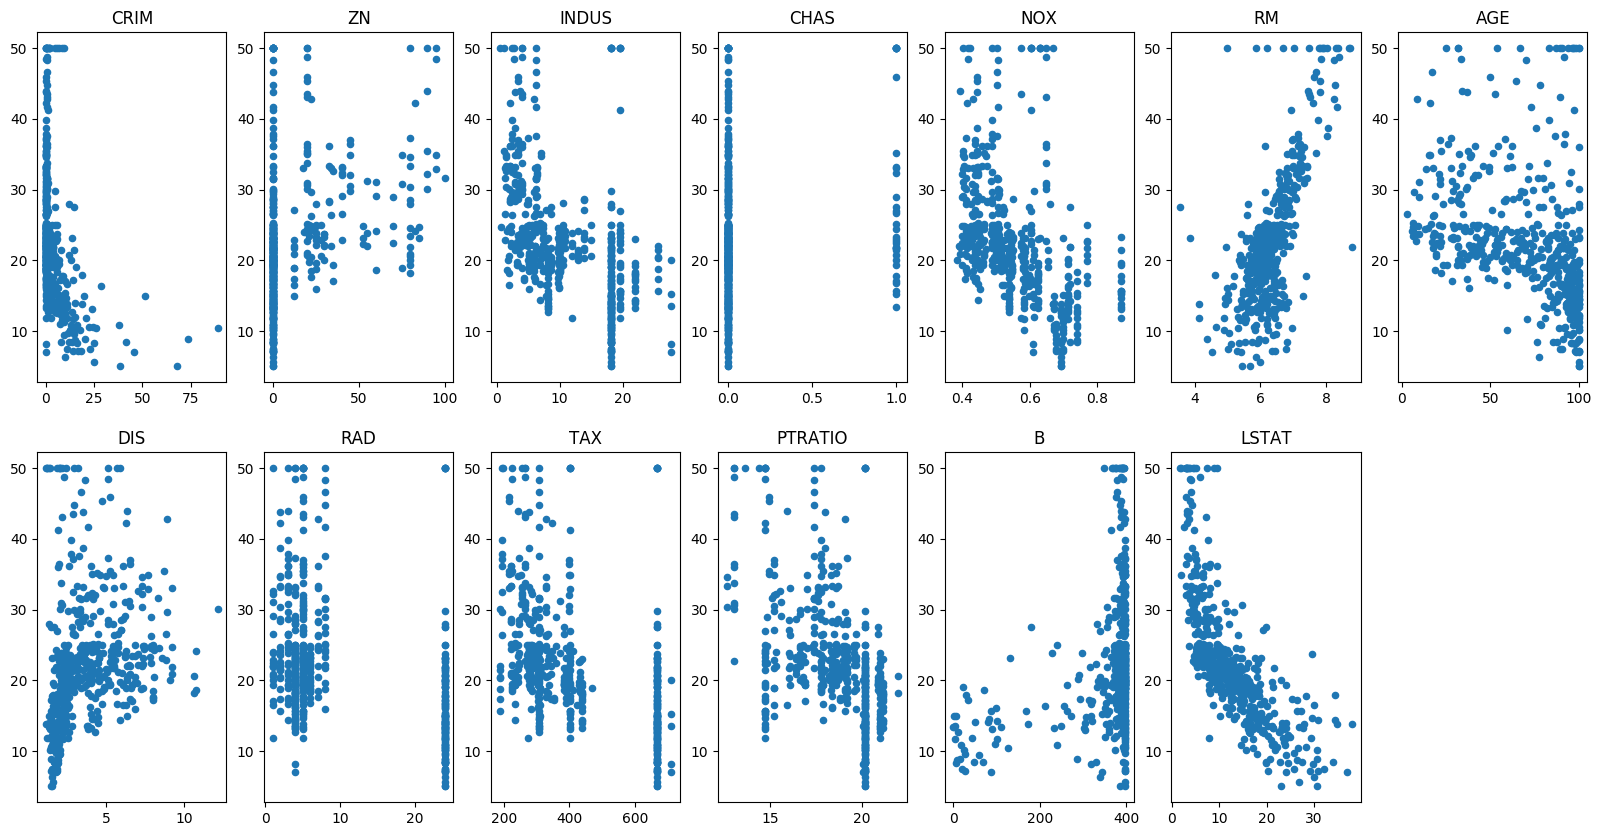

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
for i in range(13):
    plt.subplot(2,7,i+1)
    plt.scatter(boston.data[:,i],boston.target,s=20)
    plt.title(boston.feature_names[i])
plt.savefig('img.png')
plt.show()

## 数据预处理
### 任务1：数据集划分

调用sklearn.model_selection中的train_test_split()函数，把boston数据集分为训练集和测试集，划分比例是4:1。

> 补全代码：

In [43]:
from sklearn.model_selection import train_test_split
import numpy as np
# X_train,X_test,y_train,y_test = _________
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=42)



### 任务2：数据标准化处理：
#### 1. Z-score标准化

首先使用StandardScaler()函数初始化对属性值的标准化器，然后调用fit_transform()方法对训练数据进行Z-score标准化，再将这个标准化器调用transform()方法用于测试数据的标准化。


> 补全代码：

In [44]:
from sklearn.preprocessing import StandardScaler
# 初始化对属性值的标准化器
ss_X = StandardScaler()
# ss_X调用fit_transform()和transform()方法对训练数据和测试数据进行标准化
# X_train = _________
# X_test = _________

X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

#### 2. MinMax标准化

首先使用StandardScaler()函数初始化对属性值的标准化器，然后调用fit_transform()方法对训练数据进行Z-score标准化，再将这个标准化器调用transform()方法用于测试数据的标准化。

> 补全代码：

In [45]:
from sklearn.preprocessing import MinMaxScaler
# 初始化对属性值的标准化器
mm_X = MinMaxScaler()
# mm_X调用fit_transform()和transform()方法对训练数据和测试数据进行MinMax标准化
# X_train1 = _________
# X_test1 = _________

X_train1 = mm_X.fit_transform(X_train)
X_test1 = mm_X.transform(X_test)


## 模型训练与评估
### 任务3.1：线性回归模型训练

调用sklearn.linear_model中的LinearRegression()函数，对训练集(X_train,y_train)进行模型训练，并预测测试集X_test的房价lr_y_predict。

> 补全代码：

In [46]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
#线性回归模型训练
# __________________
lr.fit(X_train, y_train)
#模型预测
# __________________
lr_y_predict = lr.predict(X_test)

### 任务3.2：线性回归模型评估

回归模型常用的三种评价指标：（1）R方分数（决定系数）、（2）MSE均方误差、以及（3）MAE平均绝对误差。

方法一：调用sklearn.metrics中的相关函数，计算测试结果lr_y_predict与真实结果y_test之间的误差或精度。

In [47]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print ('the value of R-squared of LR is',r2_score(y_test,lr_y_predict))
print ('the MSE of LR is',mean_squared_error(y_test,lr_y_predict))
print ('the MAE of LR is',mean_absolute_error(y_test,lr_y_predict))

the value of R-squared of LR is 0.6687594935356321
the MSE of LR is 24.29111947497351
the MAE of LR is 3.1890919658878474


方法二：自己编写函数，计算上述指标。本实验要求学生至少完成MSE均方误差的计算，并打印输出结果。

In [48]:
# 请在下方作答
def r_squared(y_true, y_pred):
    ss_total = ((y_true - y_true.mean()) ** 2).sum()
    ss_residual = ((y_true - y_pred) ** 2).sum()
    r2 = 1 - (ss_residual / ss_total)
    return r2

def mean_squared_error_custom(y_true, y_pred):
    mse = ((y_true - y_pred) ** 2).mean()
    return mse

def mean_absolute_error_custom(y_true, y_pred):
    mae = np.abs(y_true - y_pred).mean()
    return mae

# 计算 R^2 分数
r2_custom = r_squared(y_test, lr_y_predict)
print('the value of R-squared of LR is', r2_custom)

# 计算 MSE
mse_custom = mean_squared_error_custom(y_test, lr_y_predict)
print('the MSE of LR is', mse_custom)

# 计算 MAE
mae_custom = mean_absolute_error_custom(y_test, lr_y_predict)
print('the MAE of LR is', mae_custom)


the value of R-squared of LR is 0.6687594935356321
the MSE of LR is 24.29111947497351
the MAE of LR is 3.1890919658878474


### 任务3.3：岭回归模型训练

调用sklearn.linear_model中的Ridge()函数(参数设置为5)，对训练集(X_train,y_train)进行模型训练，并预测测试集X_test的房价rd_y_predict。

> 补全代码：

In [55]:
from sklearn.linear_model import Ridge
rd = Ridge(alpha=5)
#岭回归模型训练
# __________________
rd.fit(X_train, y_train)
print(rd.coef_)
#模型测试
# __________________
rd_y_predict = rd.predict(X_test)

[-0.00073617  0.00154814 -0.00444528  0.01834779 -0.14641819  0.12824875
 -0.00383628 -0.0618929   0.01622699 -0.00066738 -0.05300312  0.00035981
 -0.0236116 ]


### 任务3.4：岭回归模型评估

与线性回归一样，岭回归模型有两种方法计算评价指标，这里调用sklearn.metrics来实现。

In [56]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print('the value of R-squared of Ridge is',r2_score(y_test,rd_y_predict ))
print('the MSE of Ridge is',mean_squared_error(y_test,rd_y_predict))
print('the MAE of Ridge is',mean_absolute_error(y_test,rd_y_predict))

the value of R-squared of Ridge is 0.518670430923267
the MSE of Ridge is 0.11126466874563082
the MAE of Ridge is 0.2814556222796957


## 参数选择
### 任务4：运用交叉验证选择模型参数

岭回归模型参数是正则化参数alpha，前面把它设置为5。为了选择最优参数，对训练集进行10次10折交叉验证。具体地，参数选择在[0,10]范围内，以1为步长，进行选择。
1. 总共进行11次实验（不同alpha值），每次实验将训练数据随机分成10份，重复10次；
2. 每一次划分，任意9份做训练，剩余1份测试，共执行10次，测试结果取平均；
3. 再将所有划分的结果再取平均，作为这一次alpha取值的分数；
4. 比较不同alpha取值的交叉验证模型分数，来选择其中表现最好的（分数最高的）模型的alpha值；
5. 用上述选择的alpha值对训练数据重新训练模型，再测试评估。

> 补全代码：

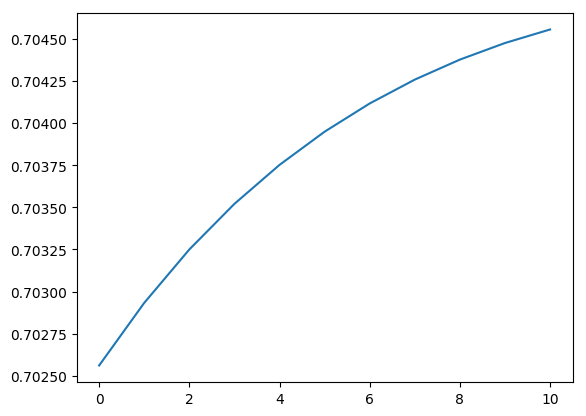

In [51]:
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold


cv_score_list = []
for i in range(11):
    # alpha 取不同值
    rd = Ridge(alpha=i)
    avg_score_cross = []
    # 进行10次随机划分
    # for j in __________
    for j in range(10):
        #调用KFold()实现10折划分
        # ____________________
        kf = KFold(n_splits=10, shuffle=True, random_state=j)
        #调用cross_val_score()计算训练集本次10折划分的分数
        # score_cross = ____________________
        score_cross = cross_val_score(rd, X_train, y_train, cv=kf)
        avg_score_cross.append(np.mean(score_cross))
    cv_score_list.append(np.mean(avg_score_cross))

plt.plot(range(11), cv_score_list)
plt.show()

# cv_score_list中找到分数最大的模型所对应的alpha取值
# ____________________
index = np.argmax(cv_score_list)
rd = Ridge(alpha=index)
#岭回归模型训练
# __________________
rd.fit(X_train, y_train)
#模型测试
# __________________
rd_y_predict = rd.predict(X_test)

## 二分类问题
### 任务5：波士顿房价二分类问题

为了了解分类问题的建模与评估，本任务将连续值的波士顿房价数值使用阈值进行二值化（0,1，例如：廉价房、品质房），可以将房价预测的回归问题，改为简单的二分类问题。

同样是包括四个步骤：数据准备、数据预处理、模型训练、模型评估与选择。


下面的程序使用方法一调用sklearn.metrics中的相应函数计算预测结果的准确率accuracy、f1 score、auc值。


In [76]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
boston = load_boston()
# 房价数值二值化
threshold = np.mean(boston.target)
labels = (boston.target>threshold).astype(np.int_)

# 数据集划分
# X_train,X_test,y_train,y_test = ____________________
X_train, X_test, y_train, y_test = train_test_split(boston.data, labels, test_size=0.2, random_state=42)

# 省略数据预处理步骤

# 模型训练
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
#线性回归模型训练
# __________________
lr.fit(X_train, y_train)
#模型预测
# __________________
lr_y_predict = lr.predict(X_test)
# print(roc_auc_score(y_test, lr_y_predict))

#预测结果二值化
lr_y_predict_bin = (lr_y_predict>0.5).astype(np.int_)
print(lr_y_predict_bin)

# 模型评估
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score
# print('the accuracy score of LR is',__________________)
# print('the f1 score of LR is',__________________)
# print('the auc of LR is',__________________)

accuracy = accuracy_score(y_test, lr_y_predict_bin)
f1 = f1_score(y_test, lr_y_predict_bin)
roc_auc = roc_auc_score(y_test, lr_y_predict)

print('the accuracy score of LR is', accuracy)
print('the f1 score of LR is', f1)
print('the auc of LR is', roc_auc)


[1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1]
the accuracy score of LR is 0.9117647058823529
the f1 score of LR is 0.8656716417910447
the auc of LR is 0.9417879417879418


方法二：自己编写函数，计算上述指标。

本实验要求学生至少完成accuracy与f1 score的计算，并打印输出结果。

In [78]:
from sklearn.datasets import load_boston
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 自定义计算准确率的函数
def accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    acc = correct / total
    return acc

# 自定义计算 F1 分数的函数
def f1_score_custom(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    
    f1 = 2 * (precision * recall) / (precision + recall)
    return f1

# 自定义计算 AUC 的函数
def auc_score(y_true, y_score):
    M = sum(y_true)
    N = len(y_true) - M
    ranks = list(zip(y_true, y_score))
    ranks.sort(key=lambda x: -x[1])
    # print(ranks)
    points = [(0, 0)]
    for it in ranks:
        x, y = points[-1]
        points.append((x, y + 1 / M) if it[0] else (x + 1 / N, y))
    area = 0
    for i in range(2, M + N):
        area += (points[i + 1][0] - points[i][0]) * (points[i][1] + points[i + 1][1])
    area /= 2
    return area


boston = load_boston()

# 房价数值二值化
threshold = np.mean(boston.target)
labels = (boston.target > threshold).astype(np.int_)

# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(boston.data, labels, test_size=0.2, random_state=42)

# 模型训练
lr = LinearRegression()
lr.fit(X_train, y_train)

# 模型预测
lr_y_predict = lr.predict(X_test)

# 预测结果二值化
lr_y_predict_bin = (lr_y_predict > 0.5).astype(np.int_)

acc = accuracy(y_test, lr_y_predict_bin)
f1 = f1_score_custom(y_test, lr_y_predict_bin)
auc = auc_score(y_test, lr_y_predict)

print('the accuracy score of LR is', acc)
print('the f1 score of LR is', f1)
print('the auc of LR is', auc)


the accuracy score of LR is 0.9117647058823529
the f1 score of LR is 0.8656716417910447
the auc of LR is 0.9417879417879399
